In [2]:
import sys
import os
# Get the path of the project directory
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the src directory to the Python path
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)
# Import necessary functions from the eda.py script
from eda import *

In [3]:
# Load the data
df = load_data('../data/togo-dapaong_qc.csv')

In [3]:
# Summary Statistics: mean, median, standard deviation
summary_stats = summary_statistics(df)
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

In [4]:
#Data Quality Check:
missing_values, negative_values = data_quality_check(df)
print("Missing Values:\n", missing_values)
print("Negative Values:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative Values:
         GHI  DNI  DHI
0      -1.3  0.0  0.0
1      -1.3  0.0  0.0
2      -1.3  0.0  0.0
3      -1.2  0.0  0.0
4      -1.2  0.0  0.0
...     ...  ...  ...
525595 -0.8  0.0  0.0
525596 -0.9  0.0  0.0
525597 -1.0  0.0  0.0
525598 -1.1  0.0  0.0
525599 -1.2  0.0  0.0

[257385 rows x 3 columns]


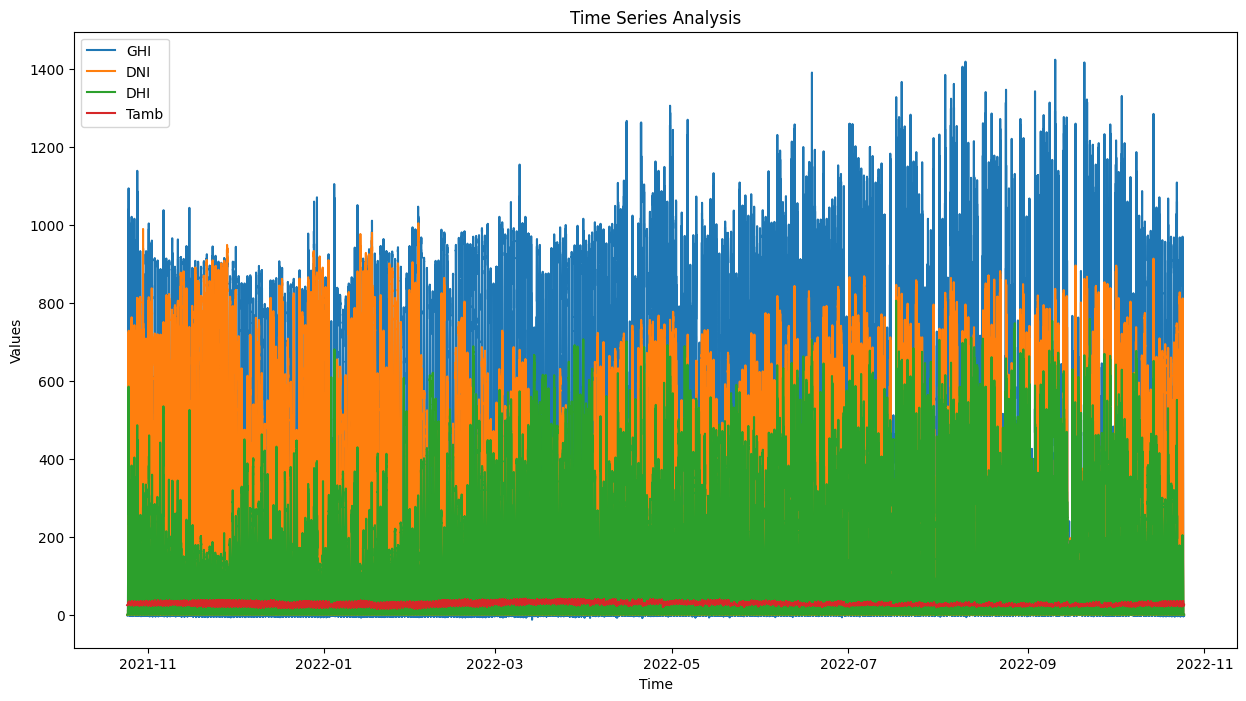

In [5]:
# time_series_analysis(df)
time_series_analysis(df)


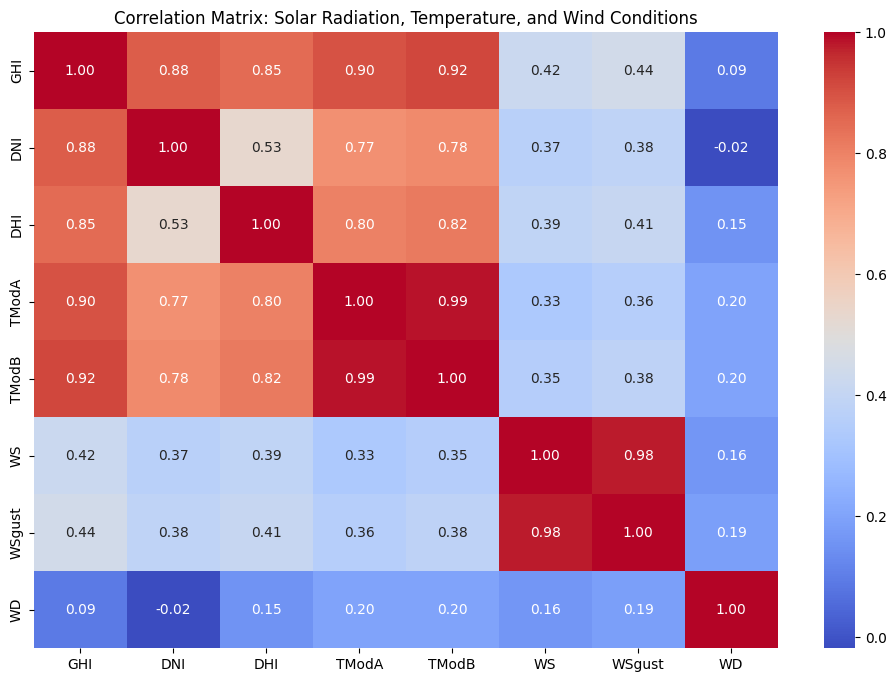

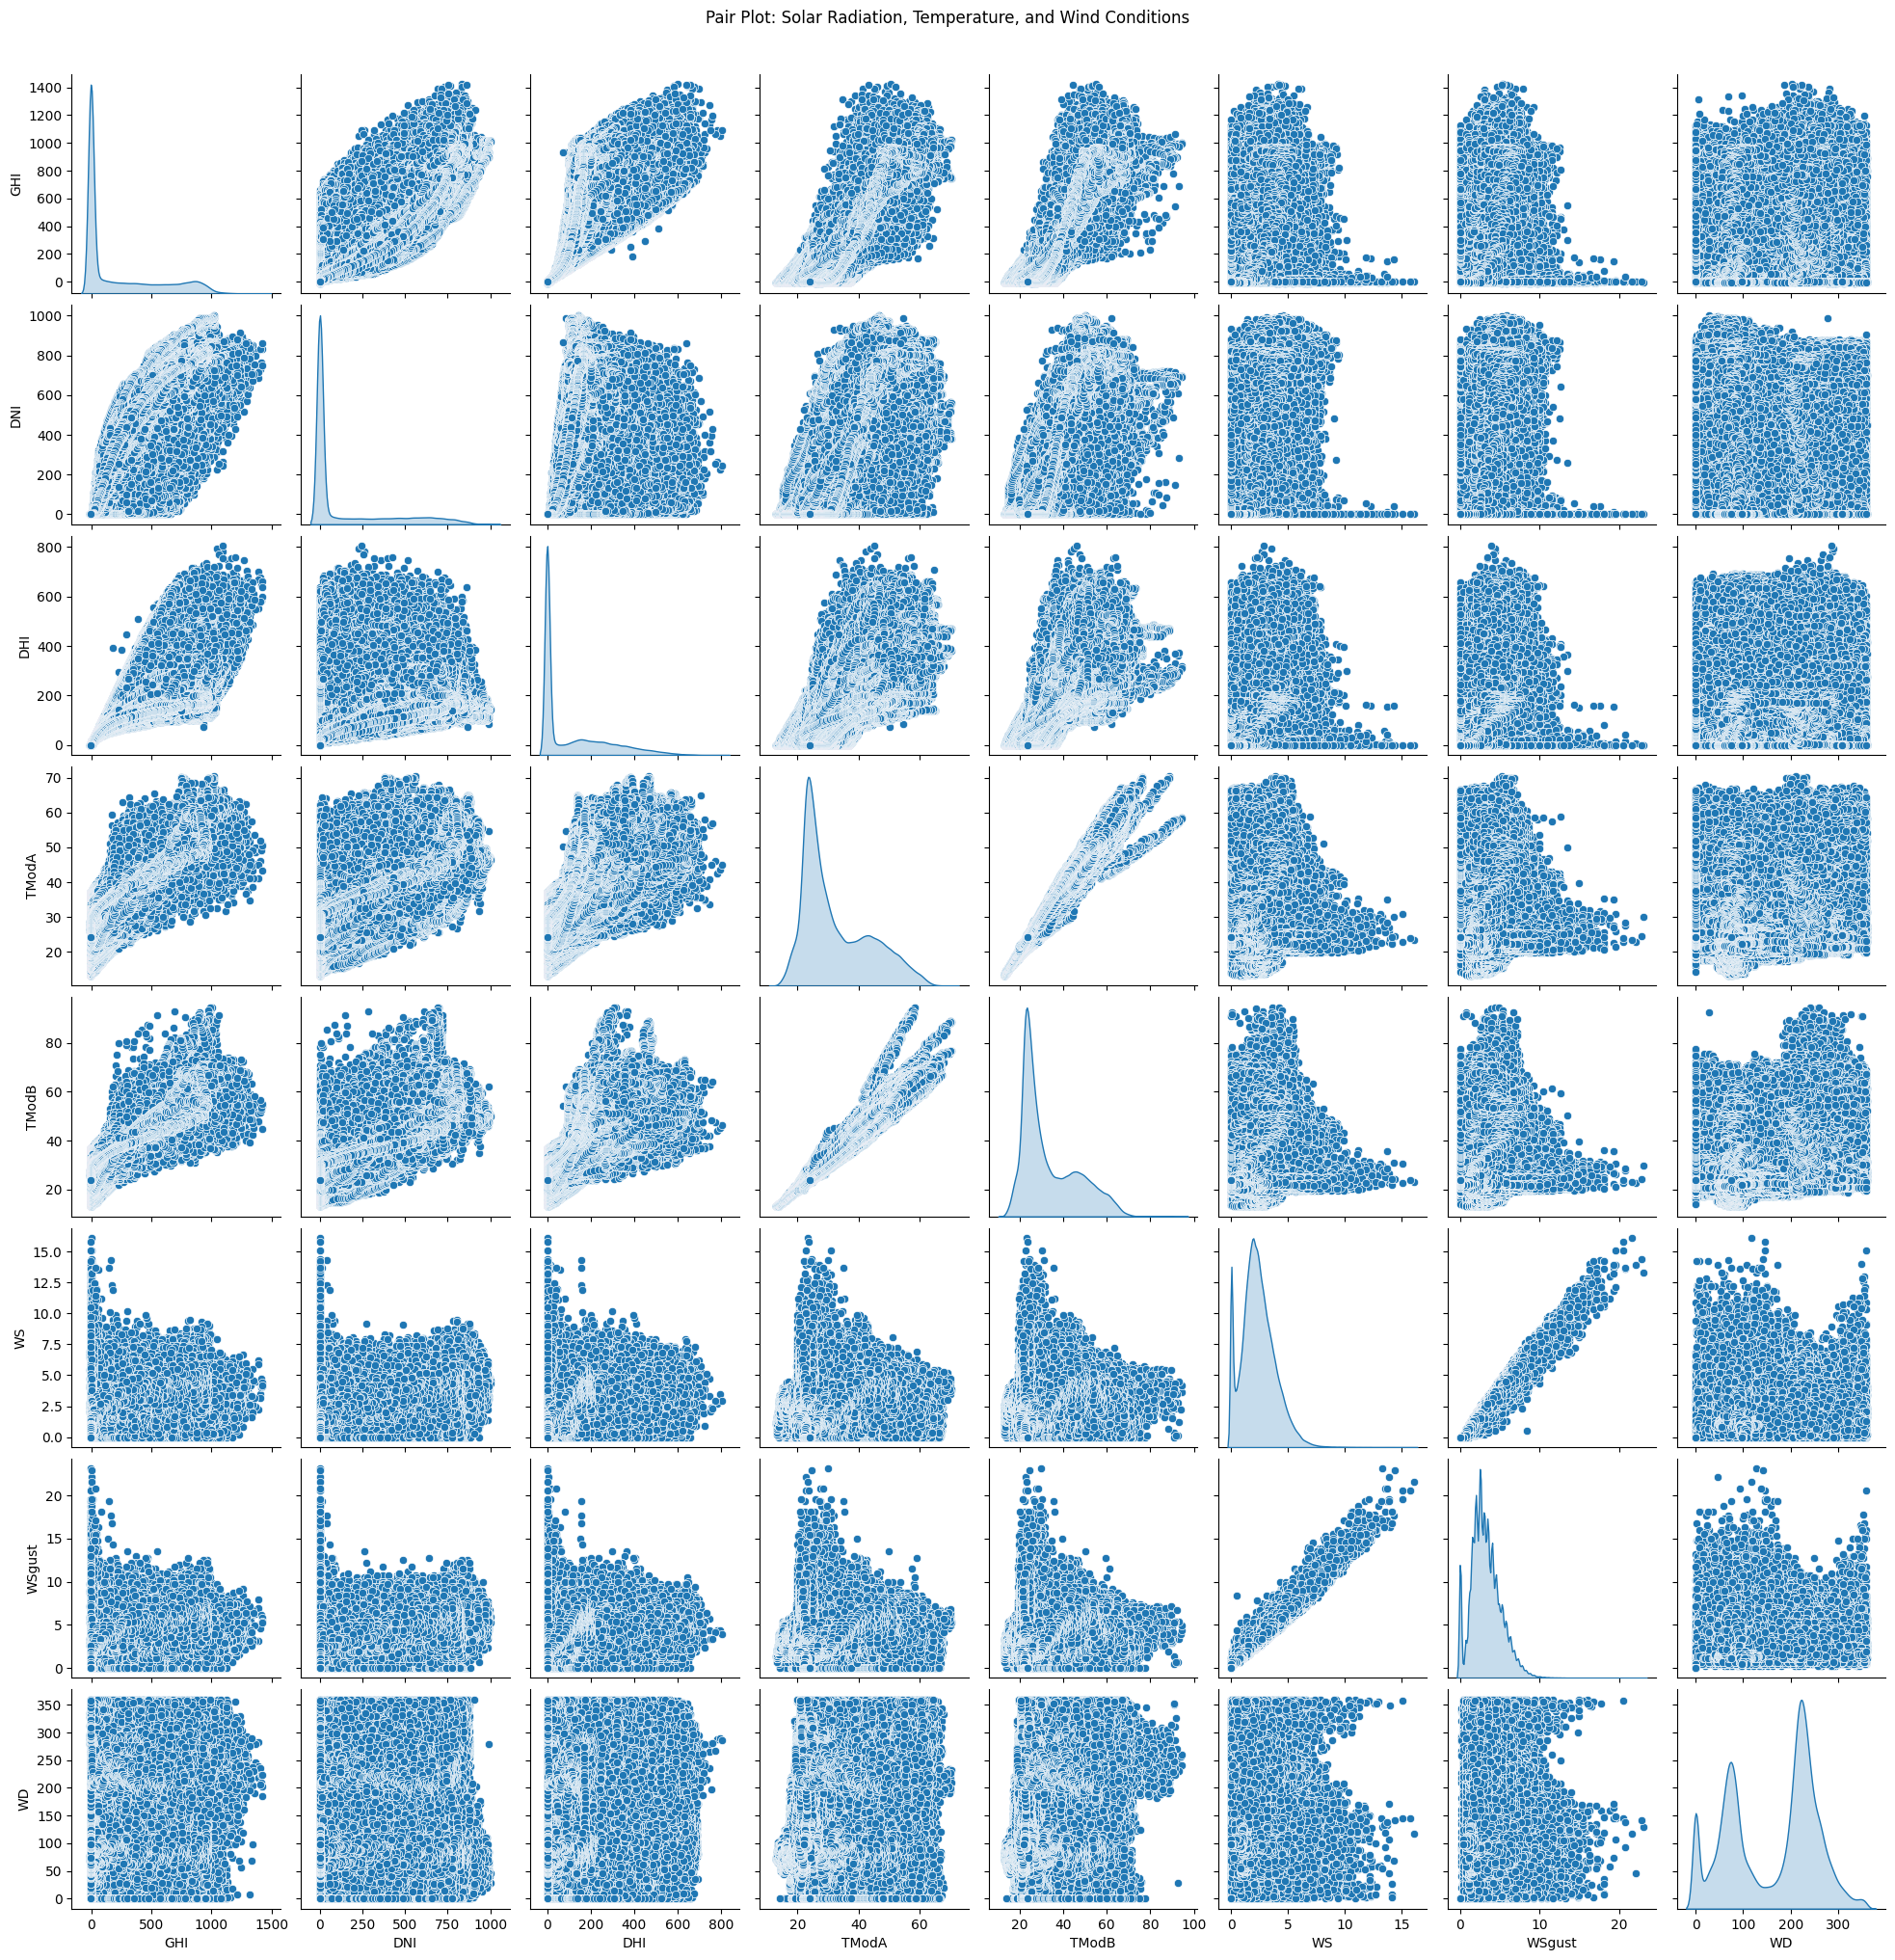

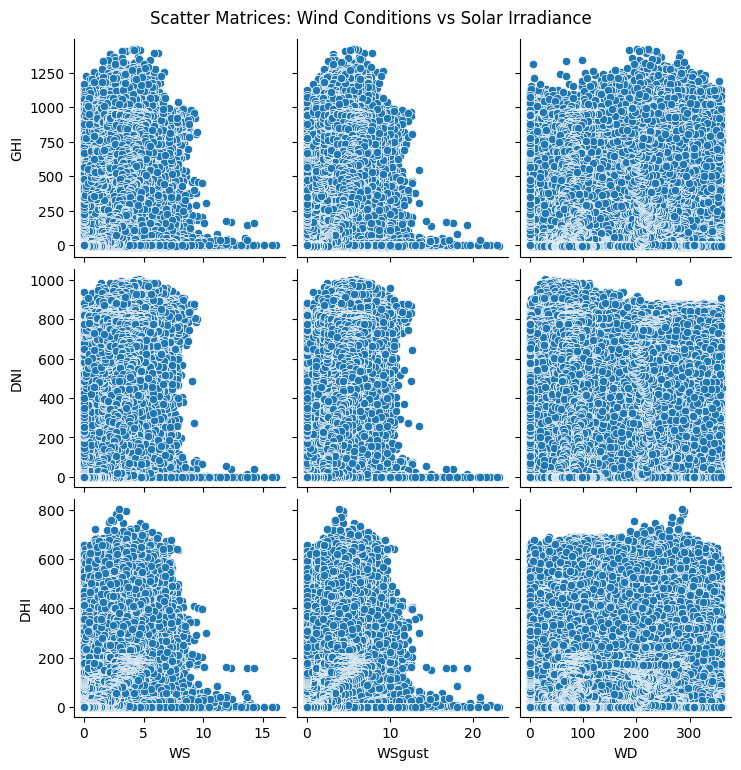

In [6]:
# Correlation Analysis
correlation_analysis(df)

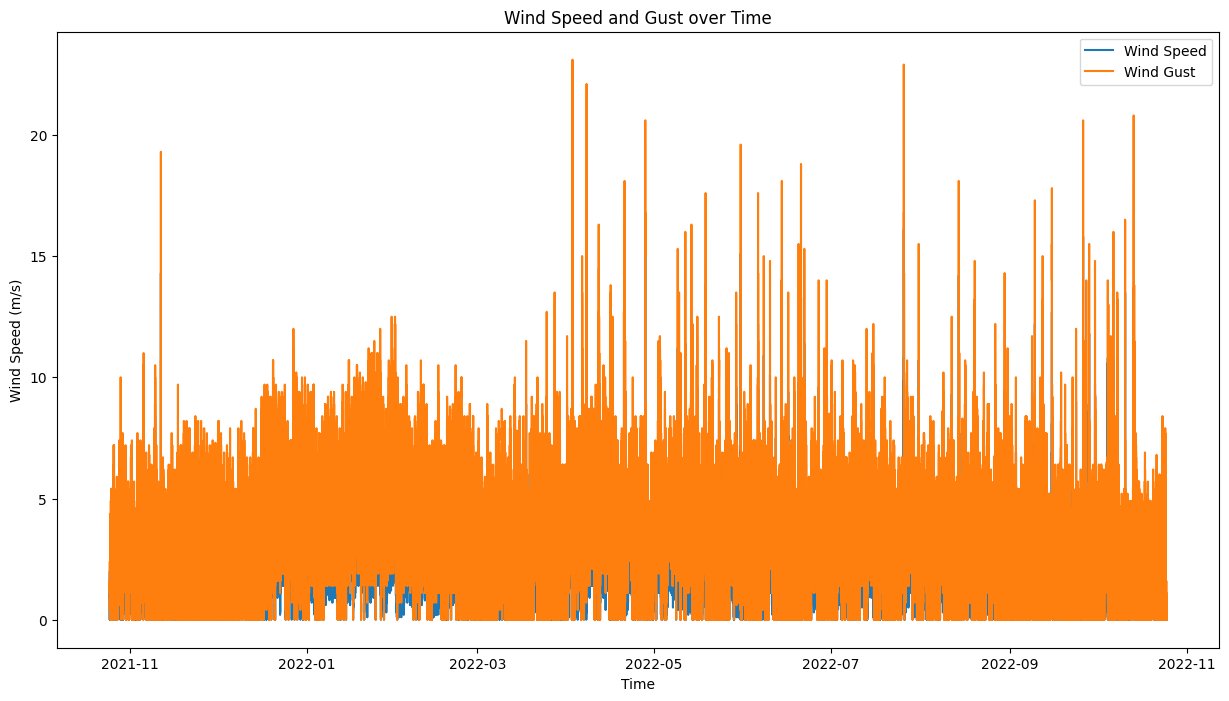

In [7]:
# wind_analysis(df)
wind_analysis(df)

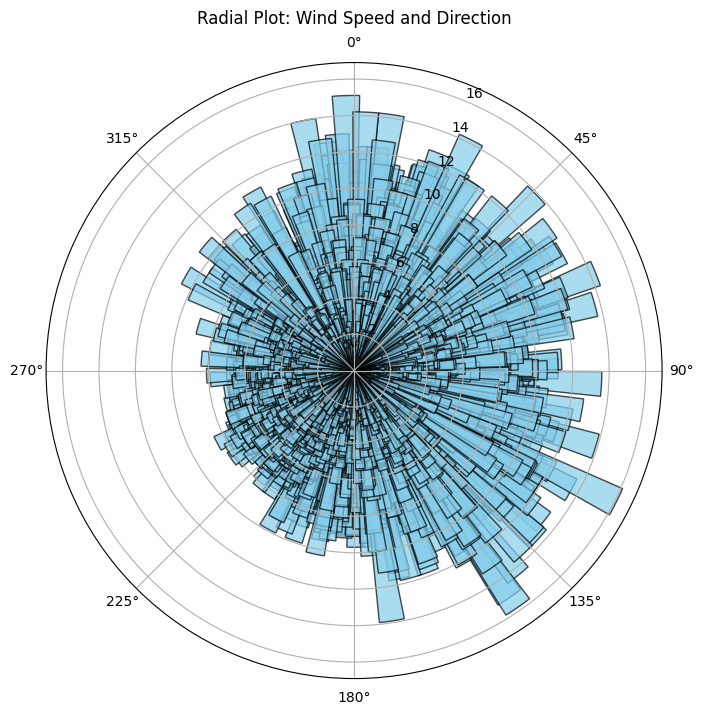

In [3]:
#wind analysis
wind_analysis1(df)

/home/gech/10Acadamy/week-0/SolarRadation/SolarRadationEDA/src/eda.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


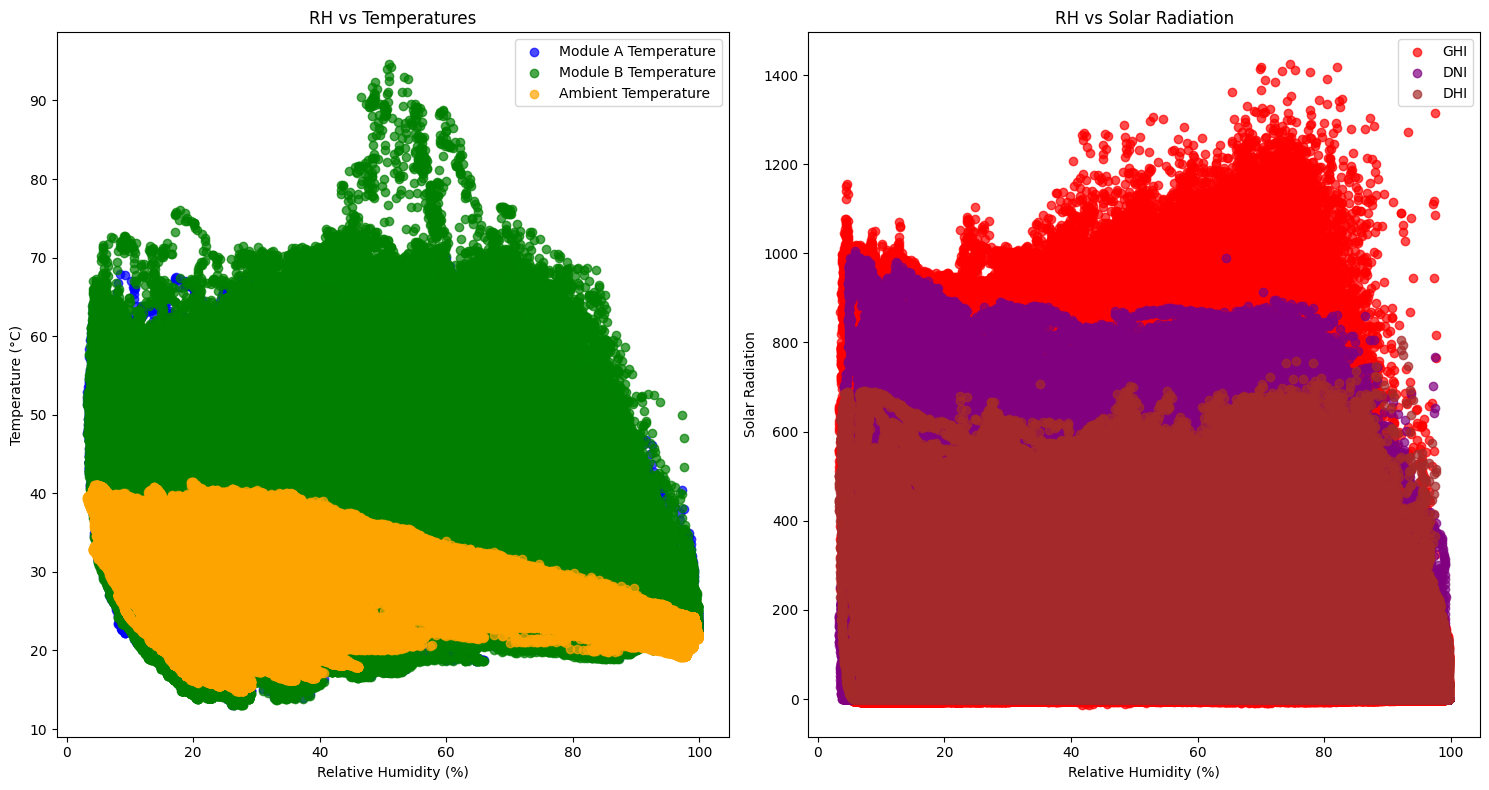

In [4]:
# Temperature Analysis
temperature_analysis(df)

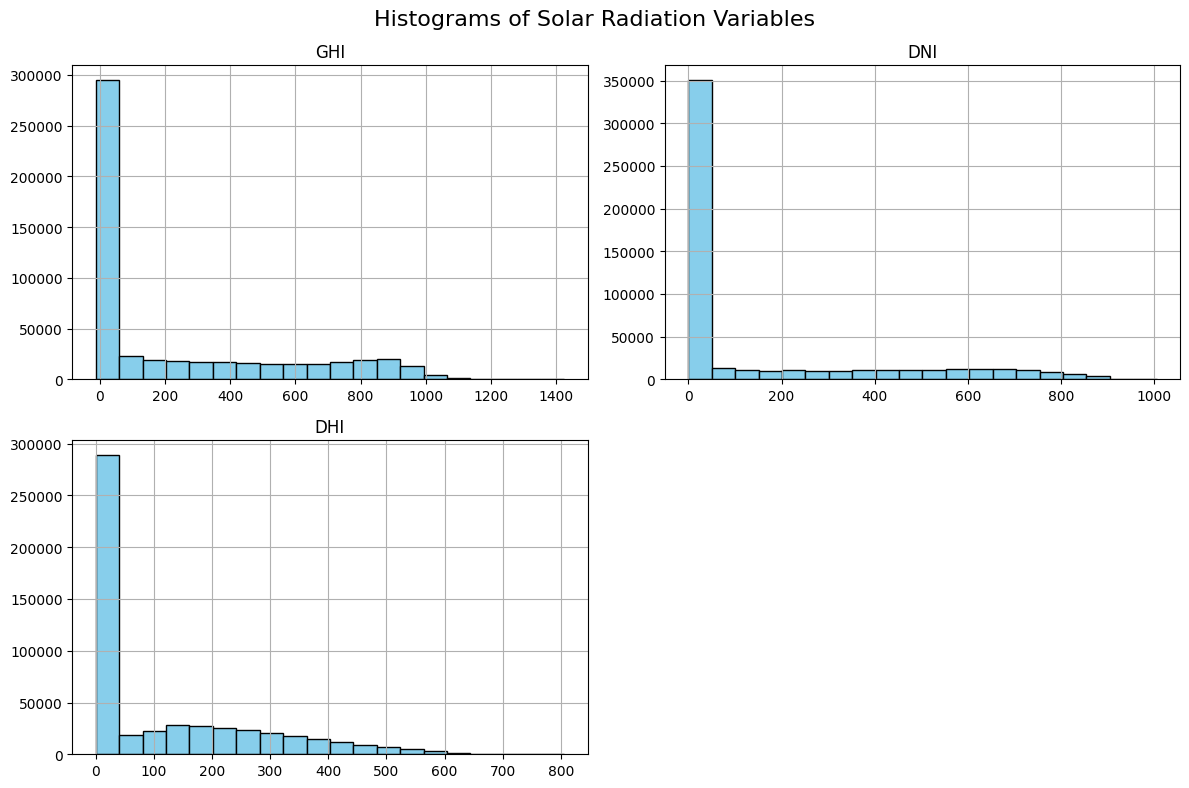

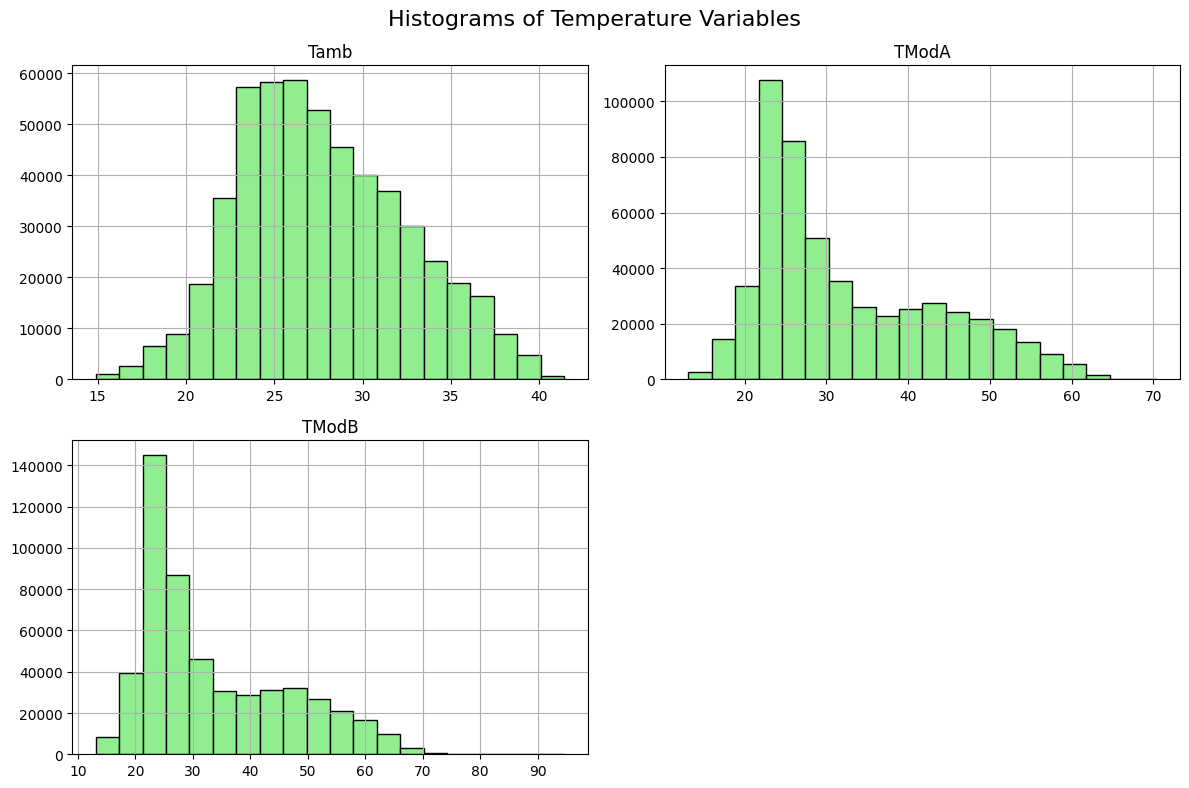

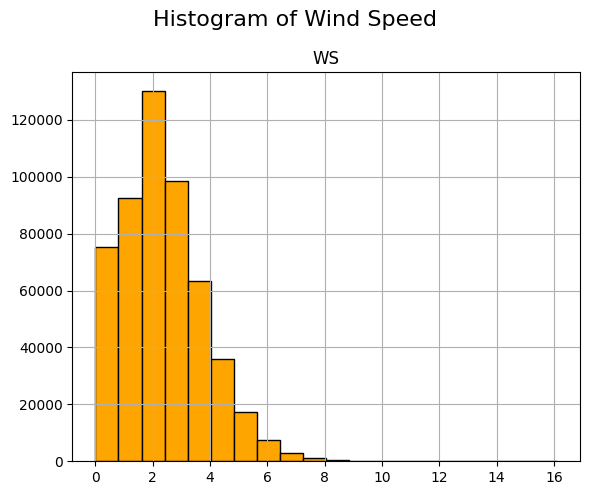

In [5]:
# Historgram Analyis
histograms(df)

In [6]:
# Columns for Z-Score Analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'WS']

# Perform Z-Score Analysis
result = z_score_analysis(df, columns_to_analyze)

# Display flagged outliers
print(result[result["Outlier_Flag"]])

                 Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
5411   2021-10-28 18:12:00   -1.0   0.0    0.0    0.0    0.0  29.3  62.4  6.9   
5413   2021-10-28 18:14:00   -0.8   0.0    0.0    0.0    0.0  28.6  63.7  7.1   
5425   2021-10-28 18:26:00   -1.3   0.0    0.0    0.0    0.0  27.3  65.0  6.9   
5429   2021-10-28 18:30:00   -1.3   0.0    0.0    0.0    0.0  27.1  65.2  6.9   
5432   2021-10-28 18:33:00   -1.4   0.0    0.0    0.0    0.0  26.9  65.6  6.9   
...                    ...    ...   ...    ...    ...    ...   ...   ...  ...   
510473 2022-10-14 11:54:00  709.5  63.7  629.8  703.1  694.9  30.2  66.6  3.5   
510474 2022-10-14 11:55:00  677.8  40.6  621.7  670.1  662.2  30.2  66.7  2.8   
510475 2022-10-14 11:56:00  659.5  29.7  614.9  651.0  643.4  30.3  66.1  4.1   
510476 2022-10-14 11:57:00  660.1  40.7  605.6  653.2  645.6  30.2  66.0  3.7   
510477 2022-10-14 11:58:00  655.8  50.2  591.0  647.5  639.9  30.2  66.2  3.4   

        WSgust  ...  TModB 

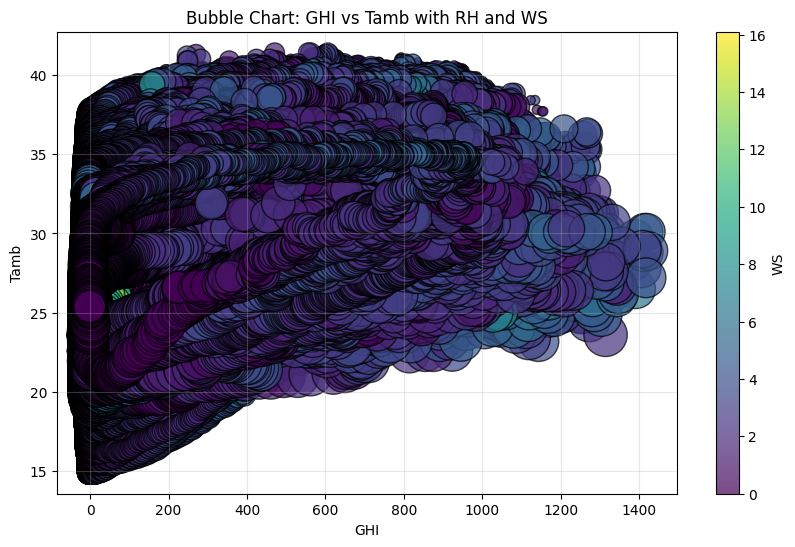

In [7]:
# Create a bubble chart for GHI vs. Tamb, with WS as color and RH as bubble size
bubble_chart(
    df,
    x_col='GHI',
    y_col='Tamb',
    size_col='RH',
    color_col='WS',
    title='Bubble Chart: GHI vs Tamb with RH and WS'
)

In [8]:
# data cleaning 
# Clean the dataset
cleaned_data = data_cleaning(df)
print(cleaned_data)
# Detect outliers in 'GHI'
ghi_outliers = detect_outliers(cleaned_data, 'GHI')
# Remove detected outliers 
cleaned_data = cleaned_data[~cleaned_data.index.isin(ghi_outliers.index)]
print(cleaned_data)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
342    2021-10-25 05:43:00  0.0  0.0  0.6   1.2   1.2  25.2  92.7  1.8   
343    2021-10-25 05:44:00  0.2  0.0  0.7   1.4   1.4  25.2  92.7  1.4   
344    2021-10-25 05:45:00  0.5  0.0  0.8   1.6   1.6  25.2  92.8  1.5   
345    2021-10-25 05:46:00  0.8  0.0  0.9   1.9   1.9  25.2  92.6  1.6   
346    2021-10-25 05:47:00  1.0  0.0  1.0   2.1   2.1  25.1  92.5  1.6   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525584 2022-10-24 23:45:00  0.2  0.0  0.0   0.0   0.0  25.1  58.9  0.0   
525585 2022-10-24 23:46:00  0.2  0.0  0.0   0.0   0.0  25.1  57.3  0.0   
525586 2022-10-24 23:47:00  0.1  0.0  0.0   0.0   0.0  25.2  58.4  0.0   
525587 2022-10-24 23:48:00  0.1  0.0  0.0   0.0   0.0  25.2  58.0  0.0   
525588 2022-10-24 23:49:00  0.0  0.0  0.0   0.0   0.0  25.2  59.2  0.0   

        WSgust  ...  TModA  TModB  GHI_zscore  DNI_zscore  DHI_zscore  \
342        2.1  ...   25.0   24.8   -0